## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

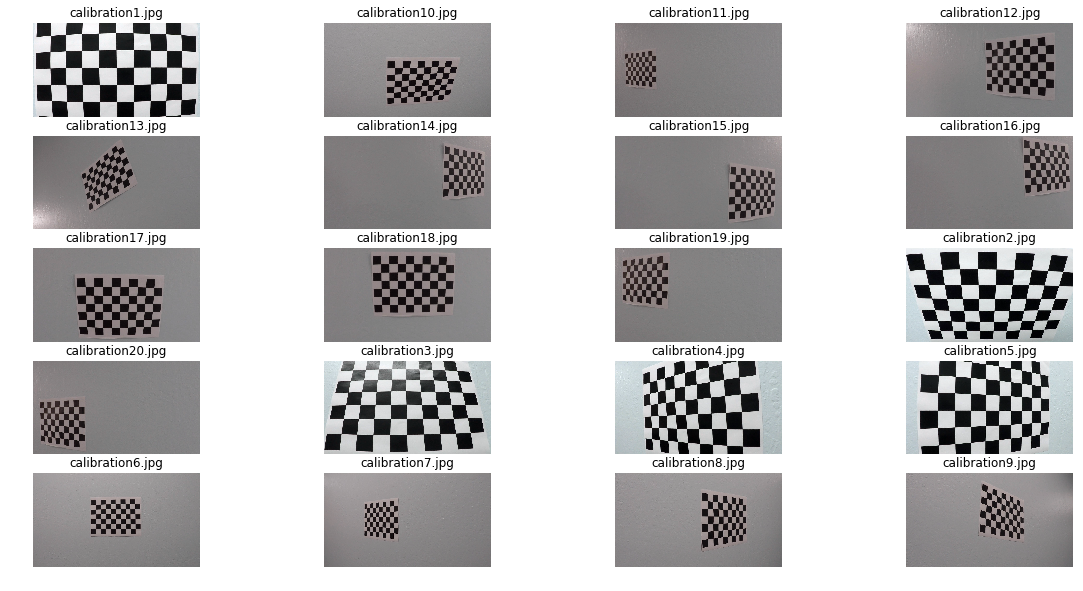

In [2]:
cal_files = glob.glob('camera_cal/calibration*.jpg')
cal_images = [cv2.imread(cal_file) for cal_file in cal_files]

plt.figure(figsize=(20,10))

for index, img in enumerate(cal_images):
    plt.subplot(len(cal_images)//4, 4, index + 1)
    plt.imshow(img)
    plt.title(cal_files[index].split('/')[1])
    plt.axis('off')

get true for camera_cal/calibration3.jpg


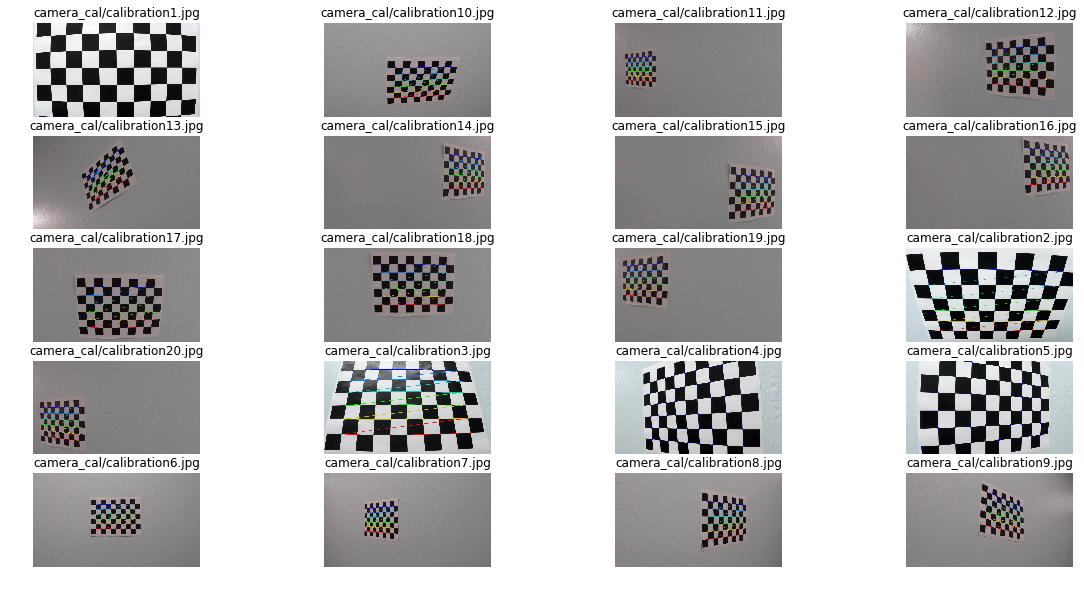

In [29]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

plt.figure(figsize=(20,10))
for index,img in enumerate(cal_images):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray,(9,6),None)
    
    if ret == True:
        print('get true for ' + cal_files[index])
        objpoints.append(objp)
        imgpoints.append(corners)
        
    cv2.drawChessboardCorners(img, (9,6), corners, ret)
    plt.subplot(len(cal_images) // 4, 4, index + 1)
    plt.imshow(img)
    plt.title(cal_files[index])
    plt.axis('off')

ret: False
corners: (53, 1, 2)


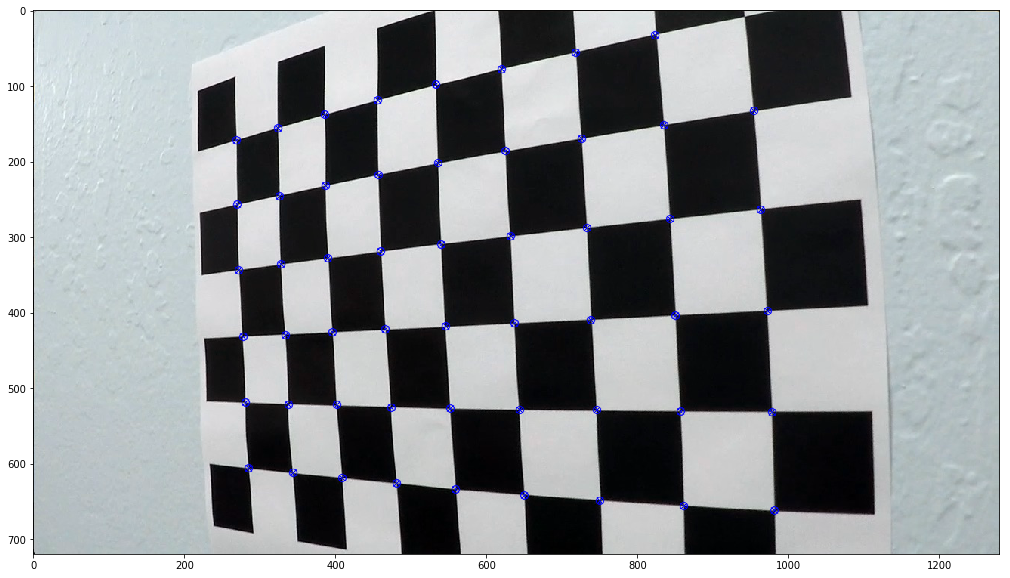

In [37]:
cal4 = 'camera_cal/calibration4.jpg'
cal4_img = cv2.imread(cal4)
gray = cv2.cvtColor(cal4_img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
cv2.drawChessboardCorners(cal4_img, (9,6), corners, ret)
plt.figure(figsize=(20,10))
plt.imshow(cal4_img)
print('ret:', ret)
print('corners:', corners.shape)

## Undistort images

In [39]:
def undistort(img, objpoints, imgpoints):
    image_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)
    return cv2.undistort(img, mtx, dist, None, mtx)

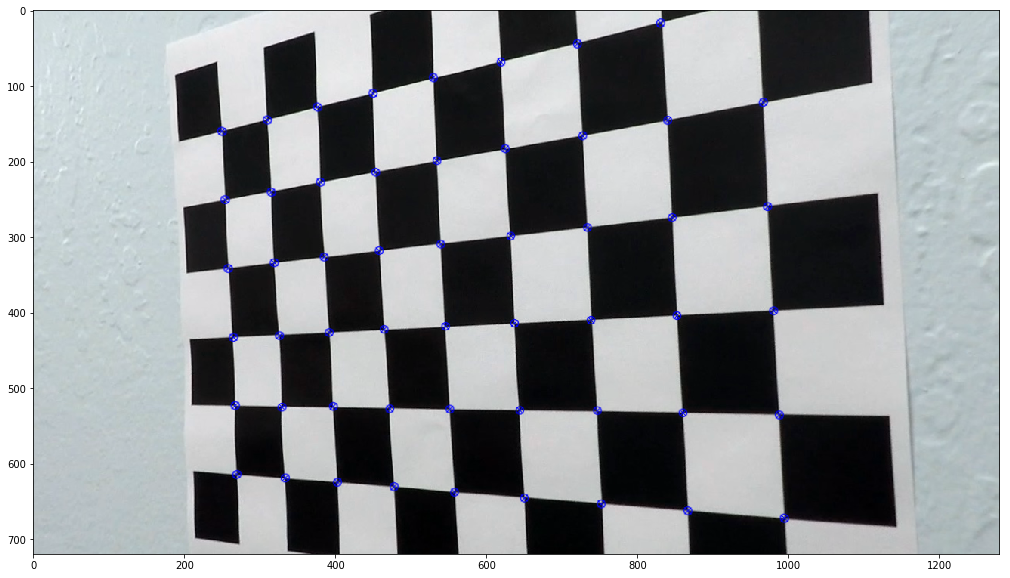

In [40]:
undistorted4_img = undistort(cal4_img, objpoints,imgpoints)
plt.figure(figsize=(20,10))
plt.imshow(undistorted4_img)